In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import scipy
import warnings 
import datetime as dt
from datetime import datetime as dt2
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Dataset/train.csv")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,578844,22602,RETROSPOT WOODEN HEART DECORATION,3,2011-11-25 16:14:00,1.63,NaN,United Kingdom
1,565618,10080,GROOVY CACTUS INFLATABLE,12,2011-09-05 15:40:00,0.39,15974.0,United Kingdom
2,570091,22780,LIGHT GARLAND BUTTERFILES PINK,4,2011-10-07 11:47:00,4.25,15632.0,United Kingdom
3,543777,22520,CHILDS GARDEN TROWEL BLUE,6,2011-02-11 16:20:00,0.85,15406.0,United Kingdom
4,572053,23203,JUMBO BAG VINTAGE DOILY,10,2011-10-20 12:28:00,2.08,14495.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
199995,536592,21576,LETS GO SHOPPING COTTON TOTE BAG,1,2010-12-01 17:06:00,5.06,NaN,United Kingdom
199996,539453,22720,SET OF 3 CAKE TINS PANTRY DESIGN,4,2010-12-17 17:08:00,11.02,NaN,United Kingdom
199997,546435,22128,PARTY CONES CANDY ASSORTED,12,2011-03-14 09:37:00,1.25,15671.0,United Kingdom
199998,575607,22550,HOLIDAY FUN LUDO,1,2011-11-10 12:37:00,7.46,14096.0,United Kingdom
199999,546423,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-03-13 12:39:00,2.95,14502.0,United Kingdom


In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

***Features and Information***

- InvoiceNo: Nominal. A 6-digit inegral number uniquely assigned to each transaction 
- StockCode: Product item (code). Uniquely assigned to easch distinct product
- Description: Product (item) name.
- Quantitiy: The quantities of each product (item) per transaction
- Invoice Date: Invoice date and time
- Price: Unit Price
- Customer ID: Customer number. Uniquely assigned to each customer
- Country: Country Name. The name of the country each customer resides.

#### Basic EDA

In [7]:
print("Number of records in the dataset:",data.shape[0])
print("Number of features in the dataset:",data.shape[1])

Number of records in the dataset: 200000
Number of features in the dataset: 8


In [8]:
data.info()
# From this we can tell some of the features have missing values and invoice date in different format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  object 
 1   StockCode    200000 non-null  object 
 2   Description  199475 non-null  object 
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   150043 non-null  float64
 7   Country      200000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.2+ MB


In [9]:
data.describe().style.background_gradient(cmap='copper')

,Quantity,UnitPrice,CustomerID
count,200000.000000,200000.000000,150043.000000
mean,9.573710,4.836241,15291.851443
std,261.632715,97.046787,1713.401420
min,-80995.000000,0.000000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,17836.460000,18287.000000


The Qunatity has some missing values we need to check because these are uncommon and they may be due to cancelled transactions.

#### Missing values analysis

In [10]:
data[data.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,578844,22602,RETROSPOT WOODEN HEART DECORATION,3,2011-11-25 16:14:00,1.63,NaN,United Kingdom
7,550203,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2011-04-15 10:37:00,7.46,NaN,United Kingdom
9,577531,22431,WATERING CAN BLUE ELEPHANT,10,2011-11-20 13:58:00,4.13,NaN,United Kingdom
10,541869,21563,RED HEART SHAPE LOVE BUCKET,1,2011-01-24 09:35:00,5.79,NaN,United Kingdom
14,581492,84997A,CHILDRENS CUTLERY POLKADOT GREEN,1,2011-12-09 10:03:00,8.29,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
199982,540154,48111,DOORMAT 3 SMILEY CATS,1,2011-01-05 11:30:00,14.43,NaN,United Kingdom
199989,561217,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,1,2011-07-25 17:09:00,13.29,NaN,United Kingdom
199992,551004,21770,OPEN CLOSED METAL SIGN,1,2011-04-26 09:48:00,9.96,NaN,United Kingdom
199995,536592,21576,LETS GO SHOPPING COTTON TOTE BAG,1,2010-12-01 17:06:00,5.06,NaN,United Kingdom


In [11]:
def missing_values(df):
    return df.isna().sum(axis = 0) / len(df) * 100

In [12]:
missing_values(data)

InvoiceNo       0.0000
StockCode       0.0000
Description     0.2625
Quantity        0.0000
InvoiceDate     0.0000
UnitPrice       0.0000
CustomerID     24.9785
Country         0.0000
dtype: float64

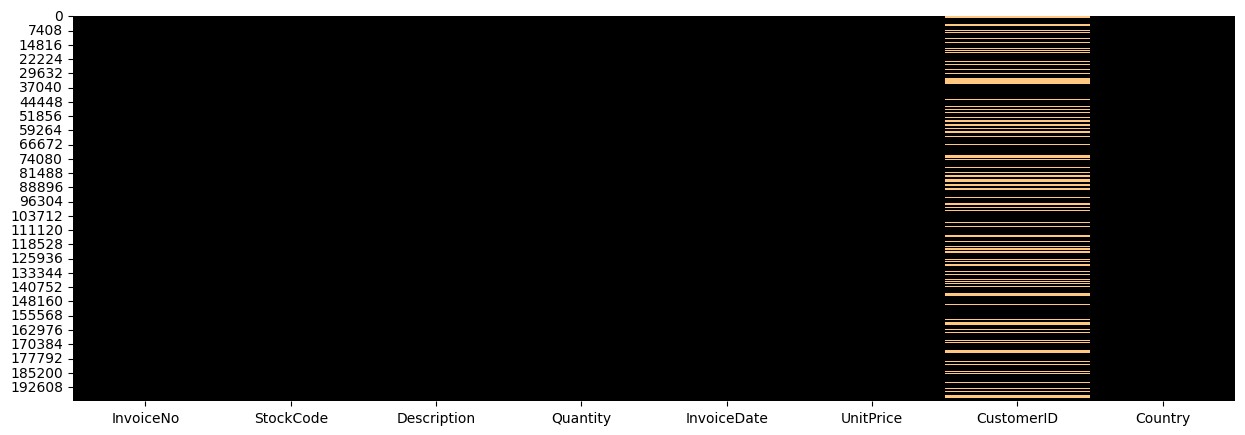

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),cbar= False, cmap='copper');

There are almost 24% percent of missing values in customer id its better to remove since we cannot get them anywhere.

In [36]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146762 entries, 1 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    146762 non-null  object        
 1   StockCode    146762 non-null  object        
 2   Description  146762 non-null  object        
 3   Quantity     146762 non-null  int64         
 4   InvoiceDate  146762 non-null  datetime64[ns]
 5   UnitPrice    146762 non-null  float64       
 6   CustomerID   146762 non-null  float64       
 7   Country      146762 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.1+ MB


#### Duplicate values

In [40]:
data[data.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39,552285,21328,BALLOONS WRITING SET,1,2011-05-08 12:58:00,1.65,14684.0,United Kingdom
96,575959,23454,THREE MINI HANGING FRAMES,2,2011-11-13 12:27:00,4.15,14547.0,United Kingdom
580,580611,21479,WHITE SKULL HOT WATER BOTTLE,1,2011-12-05 11:49:00,4.25,12748.0,United Kingdom
684,575950,22065,CHRISTMAS PUDDING TRINKET POT,2,2011-11-13 11:53:00,0.39,16983.0,United Kingdom
891,547651,22249,DECORATION WHITE CHICK MAGIC GARDEN,1,2011-03-24 12:11:00,0.85,16904.0,United Kingdom
...,...,...,...,...,...,...,...,...
199486,570223,21908,CHOCOLATE THIS WAY METAL SIGN,1,2011-10-09 13:11:00,2.10,15787.0,United Kingdom
199596,543040,21385,IVORY HANGING DECORATION HEART,1,2011-02-02 17:06:00,0.85,17337.0,United Kingdom
199626,564342,22956,36 FOIL HEART CAKE CASES,1,2011-08-24 14:53:00,2.10,16340.0,United Kingdom
199650,542107,21212,PACK OF 72 RETROSPOT CAKE CASES,1,2011-01-25 13:38:00,0.55,16222.0,United Kingdom


In [43]:
data = data.drop_duplicates(keep='first')

In [45]:
data[data.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [46]:
data.nunique()

InvoiceNo      16967
StockCode       3474
Description     3637
Quantity         212
InvoiceDate    15915
UnitPrice        326
CustomerID      4238
Country           37
dtype: int64

From this we can identify that only we have 37 country and which is non-metric data, so we can handle non-metric data in dataset

In [47]:
data['Country'].value_counts()

United Kingdom          129971
Germany                   3309
France                    3052
EIRE                      2645
Spain                      891
Netherlands                870
Belgium                    797
Switzerland                707
Portugal                   520
Norway                     421
Australia                  405
Italy                      282
Channel Islands            270
Finland                    265
Cyprus                     220
Sweden                     161
Austria                    157
Denmark                    142
Poland                     131
Japan                      117
Israel                      87
Unspecified                 87
Singapore                   78
USA                         67
Canada                      58
Iceland                     54
Greece                      44
Malta                       42
European Community          22
Lebanon                     19
United Arab Emirates        17
RSA                         17
Brazil  

In [49]:
country_transformed  = pd.get_dummies(data['Country'])

In [50]:
country_transformed.head(3)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Outlier analysis

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145971 entries, 1 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    145971 non-null  object        
 1   StockCode    145971 non-null  object        
 2   Description  145971 non-null  object        
 3   Quantity     145971 non-null  int64         
 4   InvoiceDate  145971 non-null  datetime64[ns]
 5   UnitPrice    145971 non-null  float64       
 6   CustomerID   145971 non-null  float64       
 7   Country      145971 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.0+ MB


In [58]:
numerical = data.select_dtypes(include = ['int64', 'float64'])

In [55]:
def find_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 -q1
    outliers = x[(x<(q1-1.5*IQR)) | (x>(q3+1.5*IQR))]
    return outliers

In [64]:
outlier = find_outliers(numerical)

In [68]:
outlier = outlier.dropna(how= 'all')

In [78]:
# Number of outliers
outlier.count()

Quantity       9334
UnitPrice     12658
CustomerID        0
dtype: int64

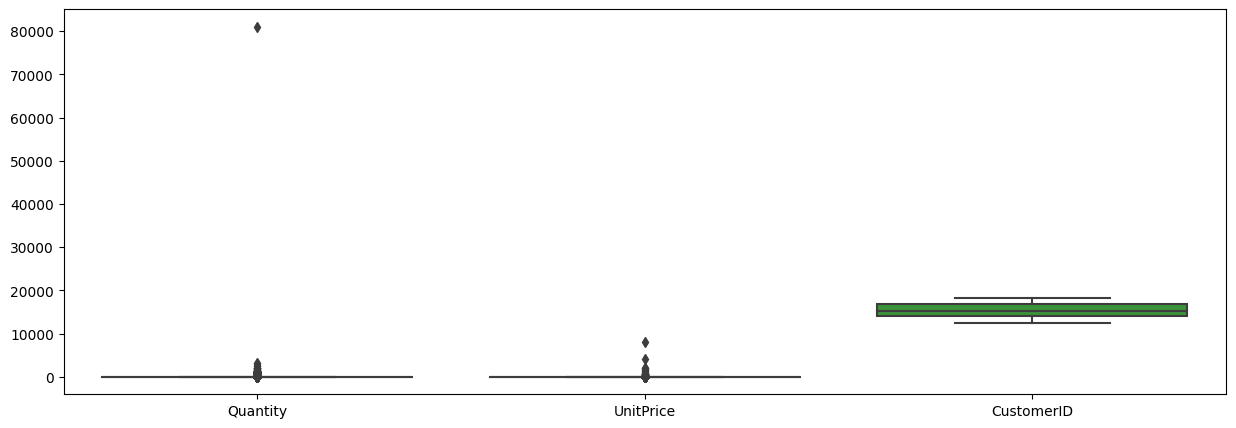

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(numerical);

In [81]:
data['InvoiceDateMonth'] = data['InvoiceDate'].dt.strftime('%Y-%m')
data['InvoiceDateDay'] = data['InvoiceDate'].dt.strftime('%a')
data['InvoiceDateHour'] = data['InvoiceDate'].dt.strftime('%H')

*How much Quantity sold per Month*

Month VS Quantity


In [85]:
data_agg_order = data.groupby("InvoiceDateMonth").Quantity.sum()
data_agg_order.head(5)

InvoiceDateMonth
2010-12    56276
2011-01    49245
2011-02    47004
2011-03    62809
2011-04    54098
Name: Quantity, dtype: int64

In [87]:
data_agg_order = pd.DataFrame(data_agg_order)
data_agg_order = data_agg_order.reset_index()
data_agg_order.head()

,InvoiceDateMonth,Quantity
0,2010-12,56276
1,2011-01,49245
2,2011-02,47004
3,2011-03,62809
4,2011-04,54098


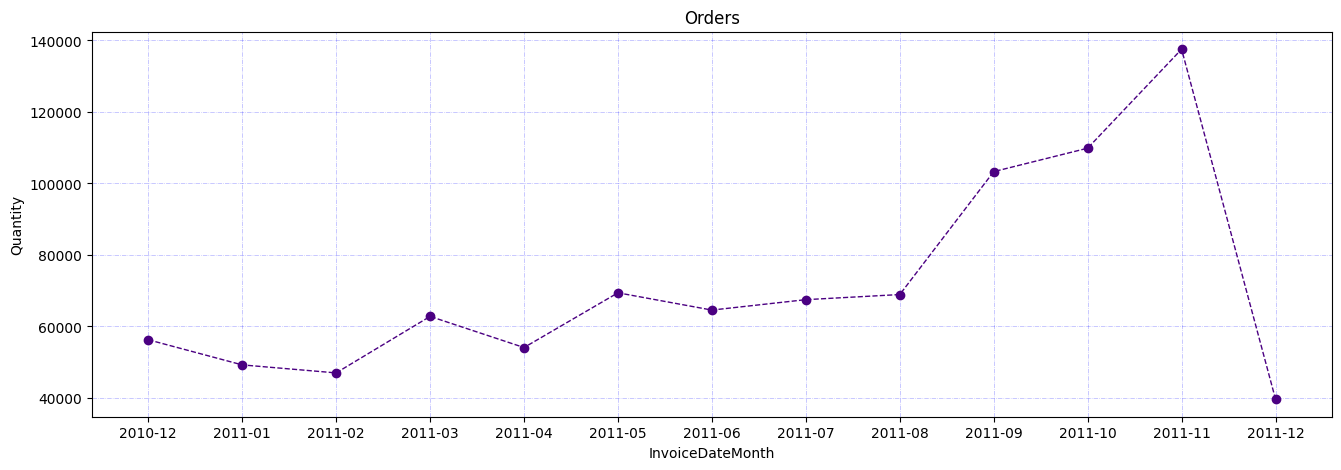

In [90]:
def plot_data(data, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_data(data_agg_order, x=data_agg_order.InvoiceDateMonth, y=data_agg_order.Quantity,title='Orders')

Products are sold highest during november

Customer spend by month

In [91]:
data['Revenue'] =  data['Quantity']*data['UnitPrice']

In [94]:
data_revenue = data.groupby(['InvoiceDateMonth'])['Revenue'].sum().reset_index()
data_revenue

,InvoiceDateMonth,Revenue
0,2010-12,106564.490
1,2011-01,84265.230
2,2011-02,80915.110
3,2011-03,104966.660
4,2011-04,89809.720
5,2011-05,122050.550
6,2011-06,108181.790
7,2011-07,108638.721
8,2011-08,112966.090
9,2011-09,176290.031


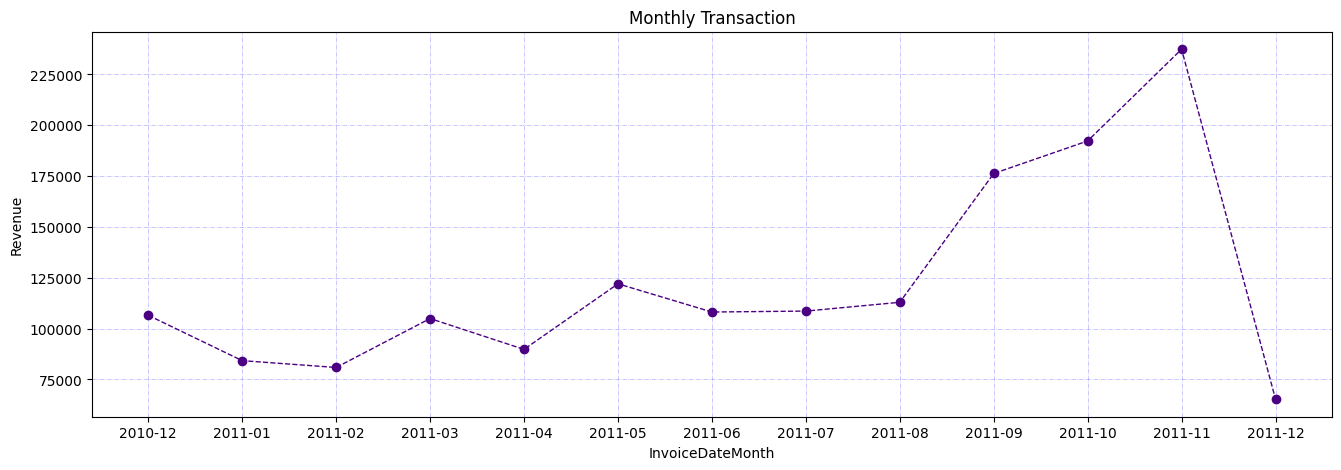

In [95]:
def plot_data_revenue(data, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Revenue', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_data_revenue(data_revenue, x=data_revenue.InvoiceDateMonth, y=data_revenue.Revenue,title='Monthly Transaction')

November has more revenue 

#### Number of customers and purchases

In [96]:
data_customer = data.groupby("InvoiceDateMonth")
data_agg_customer = data_customer['CustomerID'].count()
data_agg_customer

InvoiceDateMonth
2010-12     8157
2011-01     6431
2011-02     6096
2011-03     8342
2011-04     7029
2011-05     8614
2011-06     8280
2011-07     8433
2011-08     8372
2011-09    12491
2011-10    15571
2011-11    20643
2011-12     5629
Name: CustomerID, dtype: int64

In [97]:
data_agg_customer = pd.DataFrame(data_agg_customer)
data_agg_customer = data_agg_customer.reset_index()
data_agg_customer.head()

,InvoiceDateMonth,CustomerID
0,2010-12,8157
1,2011-01,6431
2,2011-02,6096
3,2011-03,8342
4,2011-04,7029


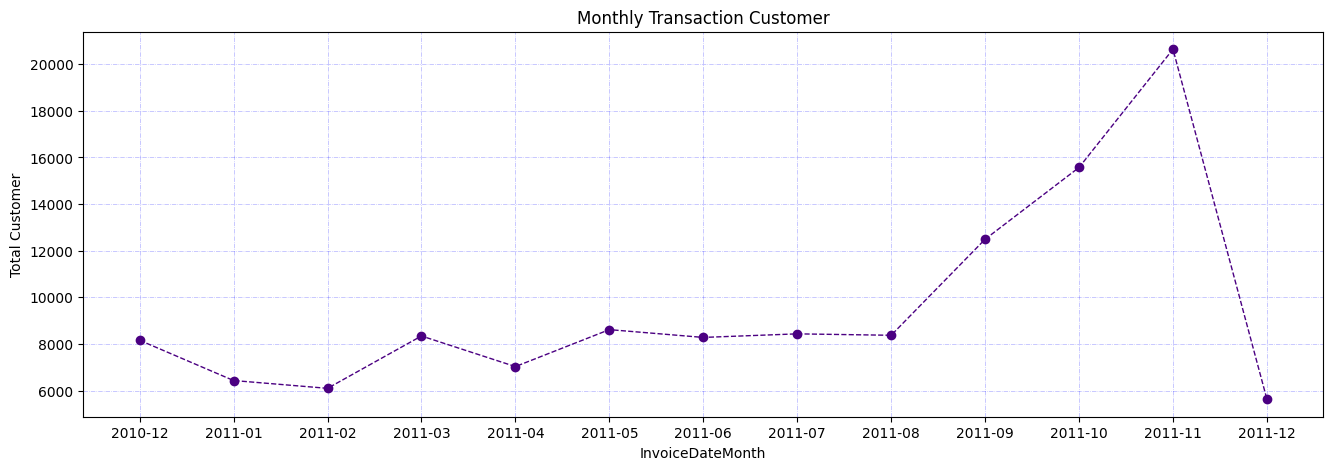

In [99]:
def plot_data_customer(data, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Total Customer', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_data_customer(data_agg_customer, x=data_agg_customer['InvoiceDateMonth'], y=data_agg_customer['CustomerID'],title='Monthly Transaction Customer')

#### Frequency of Transaction
- month

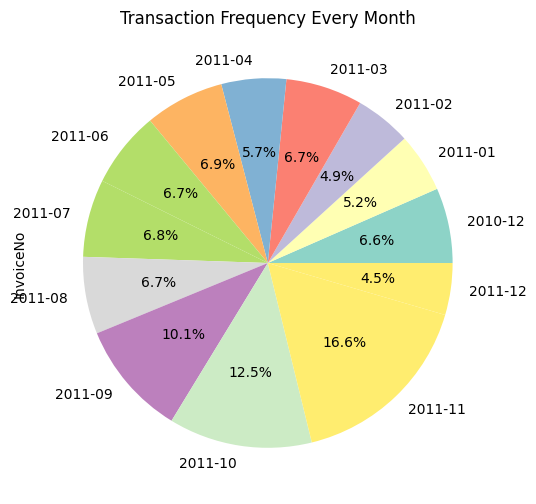

In [106]:
data_Date_Month= data.groupby("InvoiceDateMonth")
data_month_invoice=data_Date_Month['InvoiceNo'].count()
data_month_invoice=data_Date_Month['InvoiceNo'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Month')
plt.show()

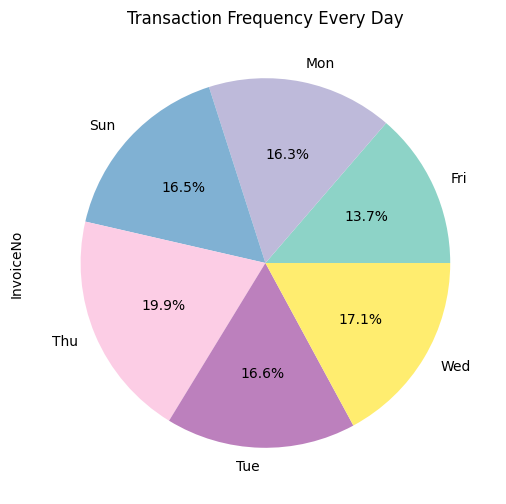

In [108]:
data_Date_Day= data.groupby("InvoiceDateDay")
data_invoice=data_Date_Day['InvoiceNo'].count()
data_invoice=data_Date_Day['InvoiceNo'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Day')
plt.show()

#### What are the most popular products

In [109]:
data['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    609
JUMBO BAG RED RETROSPOT               496
PARTY BUNTING                         483
LUNCH BAG RED RETROSPOT               449
ASSORTED COLOUR BIRD ORNAMENT         432
Name: Description, dtype: int64

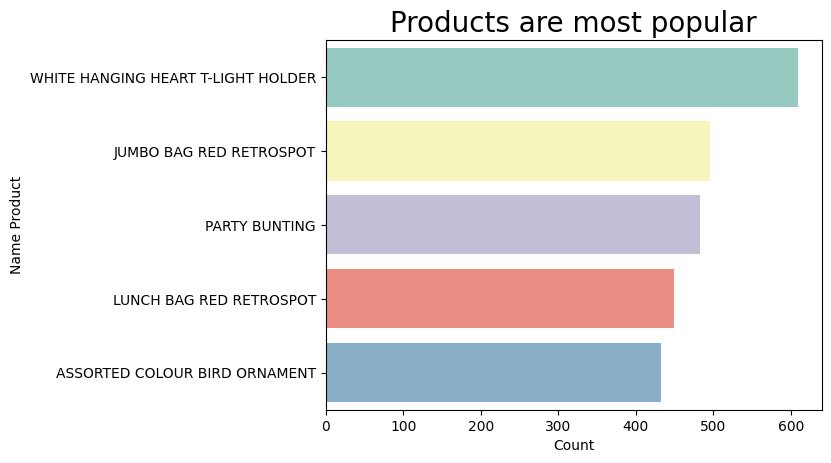

In [110]:
x = data["Description"].value_counts().head()
sns.barplot(x = x.values, y = x.index, palette='Set3')
plt.title('Products are most popular', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Name Product');

#### Most consumers by country

In [114]:
data['Country'].value_counts().head()

United Kingdom    111972
Germany             2724
France              2534
EIRE                1975
Spain                737
Name: Country, dtype: int64

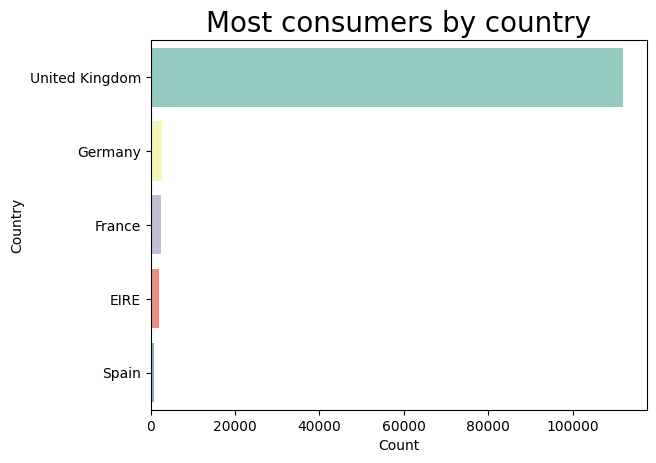

In [117]:
x = data['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, palette='Set3')
plt.title('Most consumers by country', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Country');

United kingdom has most number of consumers